<h1>Table of Contents
    <span class="tocSkip"></span>
</h1>

<div class="toc">
    <ul class="toc-item"><li><span><a href="#代码逻辑" data-toc-modified-id="代码逻辑-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>代码逻辑</a></span>
        <ul class="toc-item">
            <li><ul class="toc-item"><li><span><a href="#数据清理" data-toc-modified-id="数据清理-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>数据清理</a></span></li>
            <li><span><a href="#构建cointegration模型" data-toc-modified-id="构建cointegration模型-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>构建cointegration模型</a></span></li>
            <li><span><a href="#计算最小p-value股票对" data-toc-modified-id="计算最小p-value股票对-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>计算最小p value股票对</a></span></li>
            <li><span><a href="#Spread" data-toc-modified-id="Spread-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Spread</a></span></li>
            <li><span><a href="#划分训练集和测试集" data-toc-modified-id="划分训练集和测试集-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>划分训练集和测试集</a></span></li>
            <li><span><a href="#获取交易信号模型" data-toc-modified-id="获取交易信号模型-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>获取交易信号模型</a></span></li>
            <li><span><a href="#数据特征提取" data-toc-modified-id="数据特征提取-1.0.7"><span class="toc-item-num">1.0.7&nbsp;&nbsp;</span>数据特征提取</a></span></li>
            <li><span><a href="#模型应用" data-toc-modified-id="模型应用-1.0.8"><span class="toc-item-num">1.0.8&nbsp;&nbsp;</span>模型应用</a></span></li>
            <li><span><a href="#模型应用" data-toc-modified-id="模型应用-1.0.9"><span class="toc-item-num">1.0.9&nbsp;&nbsp;</span>模型应用</a></span></li>
          </ul></li></ul></li>
    </ul>
</div>

# 代码逻辑
* 数据清理
* 构建cointegration模型
* 计算最小的p value股票对
* 观察股票对的分离特性
* 划分训练集和测试集
* 获取交易信号模型
* 数据特征提取
* 模型应用
* 模型测试

### 数据清理

In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

In [156]:
df = pd.read_csv('000568_泸州老窖.csv', encoding='gb18030')
df.head()

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,2020-09-30,'000568,泸州老窖,143.55,146.99,142.50,146.99,144.00,-0.45,-0.3125,0.5066,7420918,1.070198e+09,2.102652e+11,2.102652e+11
1,2020-09-29,'000568,泸州老窖,144.00,146.20,142.10,145.95,144.36,-0.36,-0.2494,0.5175,7580772,1.091191e+09,2.109244e+11,2.109244e+11
2,2020-09-28,'000568,泸州老窖,144.36,146.50,140.00,141.00,138.88,5.48,3.9459,0.8403,12308484,1.777368e+09,2.114517e+11,2.114517e+11
3,2020-09-25,'000568,泸州老窖,138.88,141.33,138.11,138.50,137.72,1.16,0.8423,0.3664,5367121,7.499397e+08,2.034248e+11,2.034248e+11
4,2020-09-24,'000568,泸州老窖,137.72,141.23,137.60,139.90,139.64,-1.92,-1.375,0.3888,5694904,7.919580e+08,2.017257e+11,2.017257e+11


In [157]:
df_luzhou = pd.read_csv('000568_泸州老窖.csv', encoding='gb18030')
df_gujin = pd.read_csv('000596_古井贡酒.csv', encoding='gb18030')
df_wuliang = pd.read_csv('000858_五粮液.csv', encoding='gb18030')
df_yanghe = pd.read_csv('002304_洋河股份.csv', encoding='gb18030')
df_maotai = pd.read_csv('600519_贵州茅台.csv', encoding='gb18030')
df_shuijin = pd.read_csv('600779_水井坊.csv', encoding='gb18030')
df_jinshi = pd.read_csv('603369_今世缘.csv', encoding='gb18030')
df_shanxi = pd.read_csv('600809_山西汾酒.csv', encoding='gb18030')

In [158]:
names = [df_luzhou, df_gujin, df_wuliang, df_yanghe, df_maotai, df_shuijin, df_jinshi, df_shanxi]
for name in names:
    print(len(name))

1220
1220
1202
1
1220
1220
1220
1220


In [159]:
luzhou = df_luzhou.loc[:, ['日期', '收盘价']]
gujin = df_gujin.loc[:, ['日期', '收盘价']]
wuliang = df_wuliang.loc[:, ['日期', '收盘价']]
maotai = df_maotai.loc[:, ['日期', '收盘价']]
shuijin = df_shuijin.loc[:, ['日期', '收盘价']]
jinshi = df_jinshi.loc[:, ['日期', '收盘价']]
shanxi = df_shanxi.loc[:, ['日期', '收盘价']]

In [160]:
companies = [luzhou, gujin, wuliang, maotai, shuijin, jinshi, shanxi]
companies_name = ['泸州老窖', '古井贡酒', '五粮液', '贵州茅台', '水井坊', '今世缘', '山西汾酒']
for i in range(len(companies)):
    companies[i][companies_name[i]+'_收盘价'] = companies[i]['收盘价']
    companies[i] = companies[i].drop(['收盘价'], axis=1, inplace=True)
    

In [161]:
companies = [luzhou, gujin, wuliang, maotai, shuijin, jinshi, shanxi]
companies_name = ['泸州老窖', '古井贡酒', '五粮液', '贵州茅台', '水井坊', '今世缘', '山西汾酒']
for i in range(len(companies)):
    print(companies_name[i], companies[i]['日期'][0])

泸州老窖 2020-09-30
古井贡酒 2020-09-30
五粮液 2015/11/2
贵州茅台 2015/9/30
水井坊 2020-09-30
今世缘 2015/9/30
山西汾酒 2020-09-30


In [162]:
# 统一日期数据格式
for i in range(len(companies)):
    companies[i]['日期'] = pd.to_datetime(companies[i]['日期'],format="%Y-%m-%d").dt.date
    print(companies_name[i], companies[i]['日期'][0])

泸州老窖 2020-09-30
古井贡酒 2020-09-30
五粮液 2015-11-02
贵州茅台 2015-09-30
水井坊 2020-09-30
今世缘 2015-09-30
山西汾酒 2020-09-30


In [163]:
# 再观察一下数据，发现日期格式是object
luzhou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   日期        1220 non-null   object 
 1   泸州老窖_收盘价  1220 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [164]:
#将数据类型转换为日期类型
companies = [luzhou, gujin, wuliang, maotai, shuijin, jinshi, shanxi]
for i in range(len(companies)):
    companies[i]['日期'] = pd.to_datetime(companies[i]['日期']) #将数据类型转换为日期类型
    companies[i] = companies[i].set_index('日期', inplace=True) # 并将日期设为index

In [165]:
# 再观察一下数据，类型没有问题
luzhou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1220 entries, 2020-09-30 to 2015-09-30
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   泸州老窖_收盘价  1220 non-null   float64
dtypes: float64(1)
memory usage: 19.1 KB


In [166]:
# 所有数据合并
companies = [gujin, wuliang, maotai, shuijin, jinshi, shanxi]
result = luzhou.join(companies, how='inner')
result.head()

,泸州老窖_收盘价,古井贡酒_收盘价,五粮液_收盘价,贵州茅台_收盘价,水井坊_收盘价,今世缘_收盘价,山西汾酒_收盘价
日期,,,,,,,
2020-09-30,143.55,216.78,221.00,1668.50,64.50,44.42,198.19
2020-09-29,144.00,212.00,219.73,1652.30,64.23,44.46,196.68
2020-09-28,144.36,216.93,220.13,1661.00,64.96,43.27,196.60
2020-09-25,138.88,217.22,217.20,1635.11,62.21,43.60,196.94
2020-09-24,137.72,218.00,216.30,1629.32,62.85,43.50,198.24


In [167]:
# 观察一下数据，类型没有问题
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1202 entries, 2020-09-30 to 2015-11-02
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   泸州老窖_收盘价  1202 non-null   float64
 1   古井贡酒_收盘价  1202 non-null   float64
 2   五粮液_收盘价   1202 non-null   float64
 3   贵州茅台_收盘价  1202 non-null   float64
 4   水井坊_收盘价   1202 non-null   float64
 5   今世缘_收盘价   1202 non-null   float64
 6   山西汾酒_收盘价  1202 non-null   float64
dtypes: float64(7)
memory usage: 75.1 KB


In [168]:
# 观察数据的值，发现0值
result.describe()

,泸州老窖_收盘价,古井贡酒_收盘价,五粮液_收盘价,贵州茅台_收盘价,水井坊_收盘价,今世缘_收盘价,山西汾酒_收盘价
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,57.348744,81.068710,78.866414,705.777080,36.044434,22.738735,56.039027
std,27.479645,45.655478,49.837516,399.190255,16.446932,9.580192,40.125318
min,0.000000,26.400000,22.460000,196.640000,0.000000,11.760000,0.000000
25%,34.560000,48.082500,37.037500,347.615000,19.192500,14.402500,24.852500
50%,55.215000,63.940000,65.080000,666.800000,40.920000,18.745000,49.650000
75%,74.752500,111.600000,114.975000,973.650000,47.677500,29.555000,68.005000
max,152.380000,270.110000,240.500000,1801.980000,82.390000,54.480000,211.600000


In [169]:
# 去除0之后再次观察数据，没有问题
result=result[~result.isin([0])]
result.describe()

,泸州老窖_收盘价,古井贡酒_收盘价,五粮液_收盘价,贵州茅台_收盘价,水井坊_收盘价,今世缘_收盘价,山西汾酒_收盘价
count,1184.00000,1202.000000,1202.000000,1202.000000,1199.000000,1202.000000,1190.000000
mean,58.22060,81.068710,78.866414,705.777080,36.134621,22.738735,56.604126
std,26.75477,45.655478,49.837516,399.190255,16.368183,9.580192,39.928394
min,19.82000,26.400000,22.460000,196.640000,9.190000,11.760000,14.850000
25%,36.18000,48.082500,37.037500,347.615000,19.370000,14.402500,25.272500
50%,55.63000,63.940000,65.080000,666.800000,40.950000,18.745000,50.340000
75%,75.88000,111.600000,114.975000,973.650000,47.695000,29.555000,68.290000
max,152.38000,270.110000,240.500000,1801.980000,82.390000,54.480000,211.600000


In [170]:
# 去除空值，观察数据格式，没有问题
result.dropna(how='any', inplace=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1170 entries, 2020-09-30 to 2015-11-02
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   泸州老窖_收盘价  1170 non-null   float64
 1   古井贡酒_收盘价  1170 non-null   float64
 2   五粮液_收盘价   1170 non-null   float64
 3   贵州茅台_收盘价  1170 non-null   float64
 4   水井坊_收盘价   1170 non-null   float64
 5   今世缘_收盘价   1170 non-null   float64
 6   山西汾酒_收盘价  1170 non-null   float64
dtypes: float64(7)
memory usage: 73.1 KB


### 构建cointegration模型

In [171]:
# 所有货币对之间的cointegration关系。它返回协整测试得分矩阵，p值矩阵以及p值小于0.05的任何股票对（cointegration test）
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)# 计算cointegration
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [172]:
# 将之前得到的result复制一份
data = result.copy()

### 计算最小p value股票对

[('泸州老窖_收盘价', '贵州茅台_收盘价'), ('泸州老窖_收盘价', '水井坊_收盘价'), ('古井贡酒_收盘价', '五粮液_收盘价'), ('古井贡酒_收盘价', '贵州茅台_收盘价'), ('古井贡酒_收盘价', '水井坊_收盘价'), ('五粮液_收盘价', '贵州茅台_收盘价'), ('贵州茅台_收盘价', '山西汾酒_收盘价')]


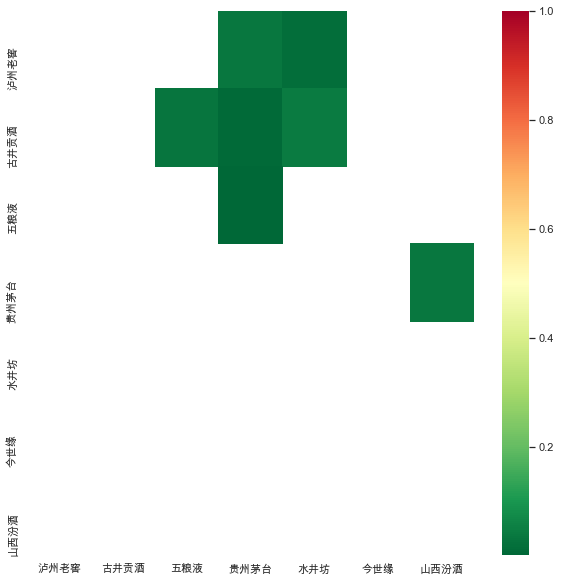

In [173]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})


# 热图显示每对股票之间的协整检验的p值。仅在热图的对角线上显示值
scores, pvalues, pairs = find_cointegrated_pairs(data)
companies_name = ['泸州老窖', '古井贡酒', '五粮液', '贵州茅台', '水井坊', '今世缘', '山西汾酒']

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pvalues, xticklabels=companies_name, yticklabels=companies_name, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print(pairs)

In [174]:
# 获得p value 最小的pair
row, col = np.where(pvalues==np.min(pvalues))# where得到最小值的索引，返回值中，前者对应行数，后者对应列数
print(data.columns[row[0]], data.columns[col[0]])

五粮液_收盘价 贵州茅台_收盘价


In [175]:
# 检验p值小于0.05，这意味着五粮液和贵州茅台确实是协整对。
S1 = data['五粮液_收盘价']
S2 = data['贵州茅台_收盘价']

score, pvalue, _ = coint(S1, S2)
pvalue

0.003115513856328999

### Spread

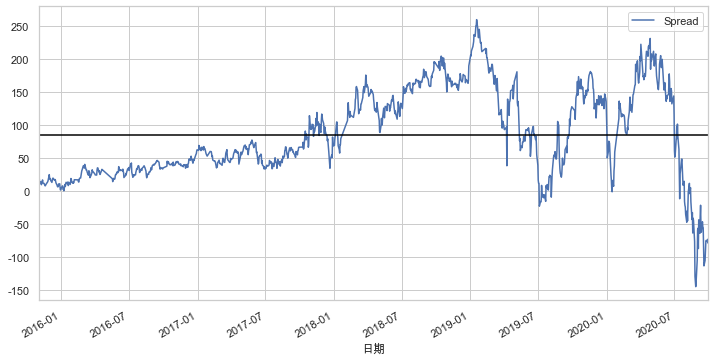

In [177]:
# 计算价差
# 绘制两个时间序列的分离程度。
# 为了实际计算价差，使用线性回归来获得用于在两种证券之间构建的线性组合的系数

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['五粮液_收盘价']
b = results.params['五粮液_收盘价']

spread = S2 - b * S1
plt.figure()
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2015-11-02', '2020-09-30')
plt.legend(['Spread'])
plt.show()

0.11014011496947941


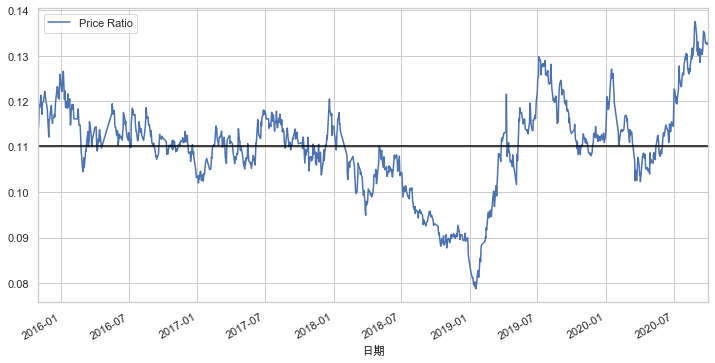

In [178]:
# 检查两个时间序列之间的比率
ratio = S1/S2
plt.figure()
print(ratio.mean())
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')
plt.xlim('2015-11-02', '2020-09-30')# 数据的时间跨度
plt.legend(['Price Ratio'])
plt.show()

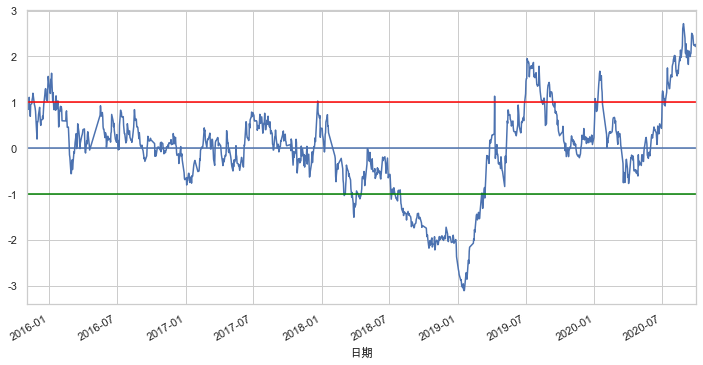

In [179]:
# 标准化此比率 使用z score

def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2015-11-02', '2020-09-30')
plt.show()

### 划分训练集和测试集

In [180]:
# 获取 训练集和测试集
def get_train_data(data, test_ratio):
    n = int(len(data) * test_ratio)
    trian_data = data[n:]
    test_data = data[:n]
    return trian_data, test_data

### 获取交易信号模型

In [181]:
#使用比率时间序列来查看它是否告诉我们是否在特定时间买入或卖出。
# 模型Y = sign(ratio(t+1) - ratio(t))
# 并划分训练集和测试集70/30
S1 = data['五粮液_收盘价']
S2 = data['贵州茅台_收盘价']
ratios = S1/S2
train, test = get_train_data(ratios, 0.3)

### 数据特征提取

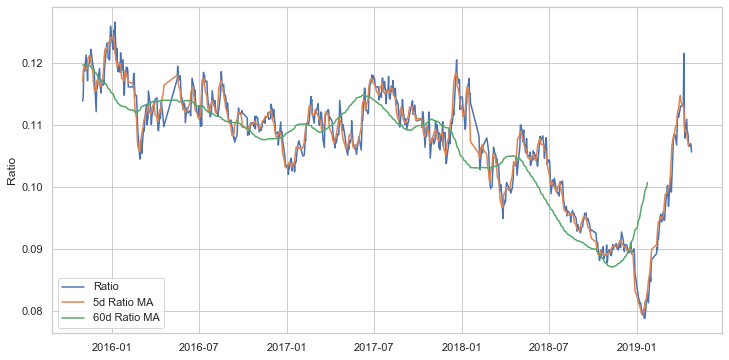

In [182]:
# 找出哪些特征在确定比率移动的方向上是重要的。知道了比率最终总是会返回到均值，因此与均值相关的移动平均值和度量标准可能很重要。
# 尝试以下特征
# 比率的60天移动平均线
# 比率的5天移动平均线
# 60天标准差
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

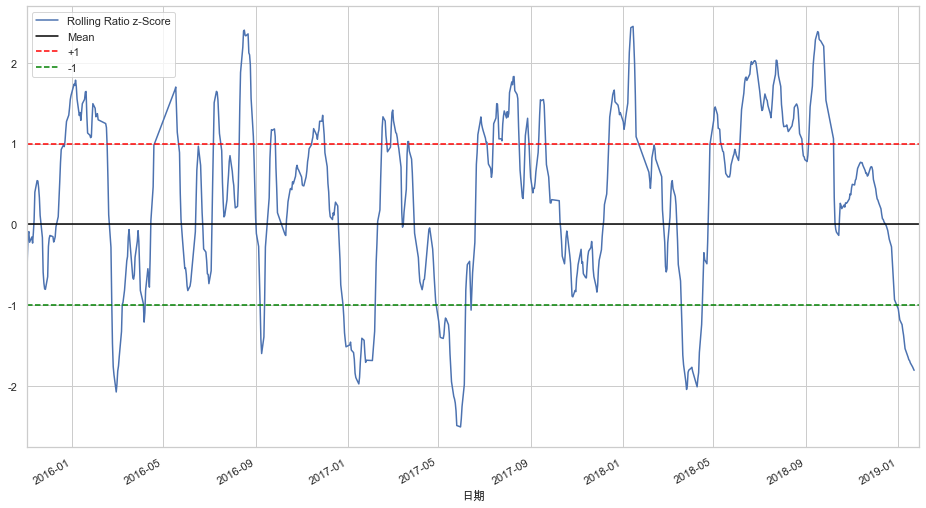

In [186]:
# z score
plt.figure(figsize=(16,9))
zscore_60_5.plot()
plt.xlim('2015-11-02', '2019-01-30')# 数据的时间跨度
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

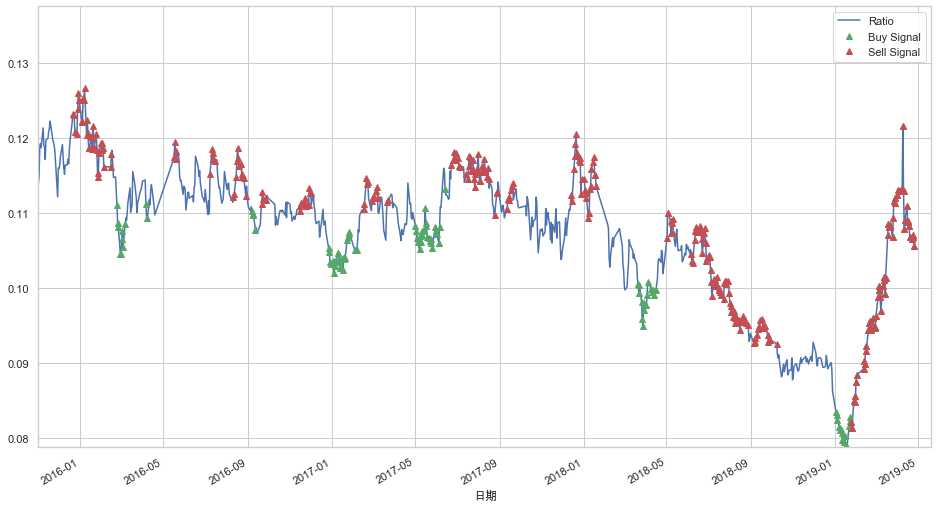

In [195]:
# 标准正态分布的平均值为0，标准偏差为1。
# 从图中可以很明显地看出，如果时间序列超出平均值1个标准偏差，
# 则趋向于返回平均值。使用这些模型，可以创建以下交易信号：
# 当z得分低于-1时购买（1），这意味着期望比率会增加。
# 只要z得分大于1，就卖出（-1），这意味着期望比率会降低。

plt.figure(figsize=(16,9))

train.plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.xlim('2015-11-02', '2019-05-20')# 数据的时间跨度
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

### 模型应用

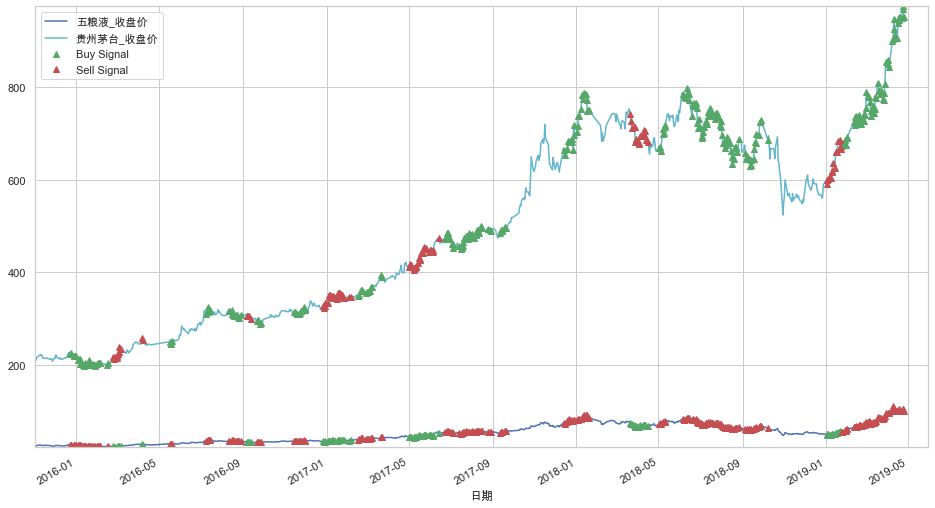

In [197]:

plt.figure(figsize=(16,9))

S1 = data['五粮液_收盘价']
S2 = data['贵州茅台_收盘价']
train_S1, test_S1 = get_train_data(S1, 0.3)
train_S2, test_S2 = get_train_data(S2, 0.3)

train_S1.plot(color='b')
train_S2.plot(color='c')

buyR = 0*train_S1.copy()
sellR = 0*train_S1.copy()


buyR[buy!=0] = train_S1[buy!=0]
sellR[buy!=0] = train_S2[buy!=0]


buyR[sell!=0] = train_S2[sell!=0]
sellR[sell!=0] = train_S1[sell!=0]

buyR.plot(color='g', linestyle='None', marker='^')
sellR.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(train_S1.min(), train_S2.min()), max(train_S1.max(), train_S2.max())))
plt.xlim('2015-11-02', '2019-05-30')

plt.legend(['五粮液_收盘价', '贵州茅台_收盘价', 'Buy Signal', 'Sell Signal'])
plt.show()

### 模型应用

In [198]:
def trade(S1, S2, window1, window2):

    
    if (window1 == 0) or (window2 == 0):
        return 0
    
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std

    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # 卖空 if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # 买多 if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # 清仓 if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
           
    return money

In [199]:
trade(train_S1, train_S2, 60, 5)

693.0932514241908